In [1]:
from numpy import random

import numpy as np
import pandas as pd
import copy
#from numpy.random import default_rng
#from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
# Saving performances of all 
results = pd.DataFrame(columns = ['Case','X1mean', 'X2mean','X3mean', 'X1std','X2std','X3std', 'X1coef', 'X2coef', 'X3coef','R2Score'])

In [3]:
random.seed(69)
datasize = random.randint(1000,10000)
print("Datasize = ",datasize)



print("\nFor feature X1 ")


cen = random.uniform(0,10)
print("Center1 = ",cen)
sd = random.uniform(0,10)
print("St. Dev1 = ", sd)


#x = random.uniform(0,10)
data1 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data1.mean())
print("Var = ", data1.var())
print("Std Dev = ", data1.std())
#print(data1)


print("\nFor feature X2 ")


cen = random.uniform(0,10)
print("Center2 = ",cen)
sd = random.uniform(0,10)
print("St. Dev2 = ", sd)
data2 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data2.mean())
print("Var = ", data2.var())
print("Std Dev = ", data2.std())

print("\nFor feature X3 ")


r1 = random.randint(0,100)
r2 = random.randint(0,100)
cen = random.uniform(0, r1)
sd = random.uniform(0, r2)
print("Center3 = ",cen, " St. Dev3 = ",sd)

#1000, ((1, 0), (3, 4)), (3, 4)

data3 = random.normal(loc = cen, scale = sd, size = datasize)
print("Mean = ",data3.mean())
print("Var = ", data3.var())
print("Std Dev = ", data3.std())



print("\nFor Noise variable ")

cen = random.uniform(0,10)
print("Center2 = ",cen)
sd = random.uniform(0,10)
print("St. Dev2 = ", sd)
noise = random.normal(loc = cen, scale = sd, size = datasize)

print("Mean = ",noise.mean())
print("Var = ", noise.var())
print("Std Dev = ", noise.std())

# Equation to generate output variable
tar = data1 * random.uniform(0,r1) + data2 * random.uniform(0,r2) + data3 * random.uniform(-10, 10) + noise

Datasize =  8371

For feature X1 
Center1 =  8.090677156733268
St. Dev1 =  3.5025252522341144
Mean =  8.009078354606547
Var =  12.148049488928466
Std Dev =  3.485405211582789

For feature X2 
Center2 =  5.039932774190819
St. Dev2 =  0.9317725852132741
Mean =  5.034318667182973
Var =  0.846234642547564
Std Dev =  0.9199101274296114

For feature X3 
Center3 =  12.310125626102696  St. Dev3 =  41.1279055063229
Mean =  12.494092721369618
Var =  1686.977205700616
Std Dev =  41.07282807039973

For Noise variable 
Center2 =  8.513705681224685
St. Dev2 =  3.114745663526831
Mean =  8.494699973054841
Var =  9.65254466542108
Std Dev =  3.106854464795717


Density plots of features X1, X2, X3, and Y

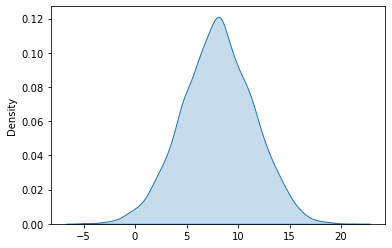

In [4]:
# For feature1
sns.kdeplot(data1, shade = True)#, hist=False)
plt.show()

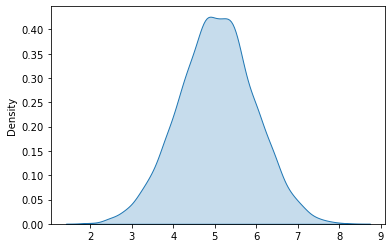

In [5]:
# For feature2
sns.kdeplot(data2, shade = True)#, hist=False)
plt.show()

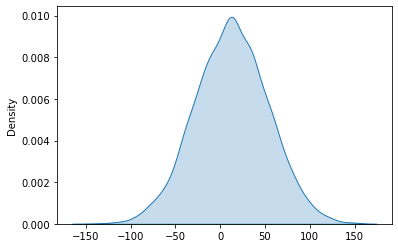

In [6]:
# For feature3
sns.kdeplot(data3, shade = True)#, hist=False)
plt.show()

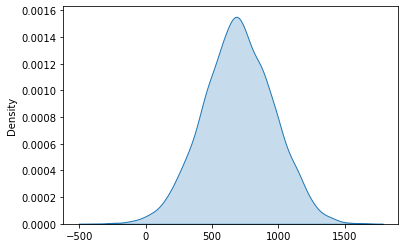

In [7]:
# For target variable 
sns.kdeplot(tar, shade = True)
plt.show()

In [8]:
# creating a stack from x1, x2, x3

features = np.vstack([data1,data2,data3]).transpose()
#print(X.head)
print(features.dtype)
print(features[:10])

target= np.vstack([tar]).transpose()
print(target.dtype)
print(target[:10])

float64
[[  9.14301131   4.96469681   7.7133153 ]
 [ 13.05498569   4.48851739  38.40766689]
 [  6.50328775   3.03616128  11.10559629]
 [  7.10048072   6.03124741  84.94080984]
 [  8.67823852   4.65615826  42.74458519]
 [  6.59360373   5.66333428  83.84540141]
 [ 11.83739619   5.00532148 -12.08246769]
 [ 11.27480781   5.14443317  -0.37056437]
 [ 12.05479949   4.37413298   1.41714348]
 [  5.09206048   5.53585185  14.70785923]]
float64
[[ 778.69801863]
 [1108.35993005]
 [ 552.49021978]
 [ 734.80876208]
 [ 779.96776596]
 [ 686.02836711]
 [ 948.4102039 ]
 [ 928.88768049]
 [ 979.13572004]
 [ 490.57992591]]


In [9]:
X = pd.DataFrame(features, columns = ["X1", "X2", "X3"])
X.head()

,X1,X2,X3
0,9.143011,4.964697,7.713315
1,13.054986,4.488517,38.407667
2,6.503288,3.036161,11.105596
3,7.100481,6.031247,84.940810
4,8.678239,4.656158,42.744585


In [10]:
y = pd.DataFrame(target, columns = ["Y"])
y.head()

,Y
0,778.698019
1,1108.359930
2,552.490220
3,734.808762
4,779.967766


Linear Regression model

In [11]:
# Applying linear Regression model
lreg = LinearRegression()

def applymodel(lreg, X, y, case, results):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
    lreg.fit(X_train, y_train)

    y_pred = lreg.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    print("MSE = ", mse)

    r2 = r2_score(y_test, y_pred)
    print("R2 score = ", r2)
    print("Coefficients = ", lreg.coef_)
    print("Intercept = ", lreg.intercept_)

    row = {'Case':case,'X1mean':X['X1'].mean(), 'X2mean':X['X2'].mean(),'X3mean': X['X3'].mean(), 
           'X1std':X['X1'].std(),'X2std':X['X2'].std(),'X3std':X['X3'].std(), 'X1coef':lreg.coef_[0][0], 
           'X2coef':lreg.coef_[0][1], 'X3coef':lreg.coef_[0][2],'R2Score':r2}

    results = results.append(row,ignore_index = True)
    return results
#print(results)

In [12]:
# applying linear regression model and storing the performance in results
results = applymodel(lreg, X, y, "Simple Linear Reg ", results)
#print(results)

MSE =  9.3530486175428
R2 score =  0.9998644340192505
Coefficients =  [[74.96842868 14.3114592   1.30836979]]
Intercept =  [8.31991729]


Adding Outliers to data

In [13]:
#adding outliers manually
# creating a copy to use later
temp = copy.deepcopy(X)
temp.head()

,X1,X2,X3
0,9.143011,4.964697,7.713315
1,13.054986,4.488517,38.407667
2,6.503288,3.036161,11.105596
3,7.100481,6.031247,84.940810
4,8.678239,4.656158,42.744585


In [14]:
temp1 = copy.deepcopy(y)
temp1.head()

,Y
0,778.698019
1,1108.359930
2,552.490220
3,734.808762
4,779.967766


In [15]:
X.head()
print(temp['X1'].max())
print(type(X))

21.108076680259153
<class 'pandas.core.frame.DataFrame'>


Adding Outliers function (outliers and large magnitude outliers)

In [16]:
def addoutliers(X,datasize,flag):

    r = random.randint(100,1000)
    print("Number of Outliers added ",r)
    maxval1 = X['X1'].max()
    maxval2 = X['X2'].max()
    maxval3 = X['X3'].max()
    c1 = c2 = c3 = 0
    for i in range (r):
        col = random.randint(1,4)
        pos = random.randint(0, datasize)
        multval = random.uniform(1,3)

        if col == 1:
            if flag:
                X['X1'][pos] =  maxval1 * multval * pow(-1, random.randint(1,3)) # small outliers
            else:
                X['X1'][pos] = X['X1'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) #large magnitude outliers
            #print("X1 -> ", X['X1'][pos])
            c1 += 1
        elif col == 2:
            if flag:
                X['X2'][pos] = maxval2 * multval * pow(-1,random.randint(1,3)) 
            else:
                X['X2'][pos] = X['X2'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) 
            #print("X2 -> ", X['X2'][pos])
            c2 +=1
        elif col == 3:
            if flag:
                X['X3'][pos] = maxval3 * multval * pow(-1,random.randint(1,3)) #X['X3'][pos] *
            else:
                X['X3'][pos] = X['X3'][pos] * maxval1 * multval * pow(-1, random.randint(1,3)) 
            #print("X3 -> ", X['X3'][pos])
            c3 +=1
    print("Outliers added column wise-> ",c1," ", c2," ", c3)
    return X

In [17]:
X = addoutliers(X,datasize, True)

Number of Outliers added  648
Outliers added column wise->  226   212   210


In [18]:
checkpto1x = copy.deepcopy(X)
checkpto1y = copy.deepcopy(y)

Using boxplot to see outliers

<AxesSubplot:xlabel='X1'>

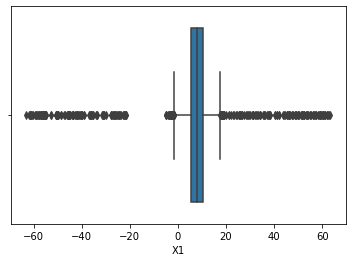

In [19]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

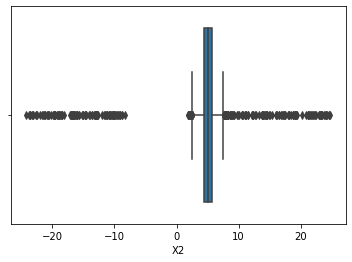

In [20]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

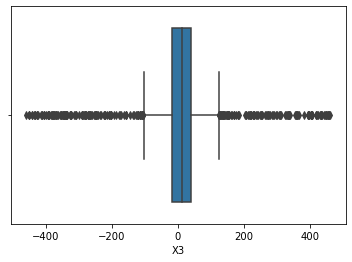

In [21]:
sns.boxplot(x = X['X3'])

Max and min values in X1, X2, X3

In [22]:
print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())

print(type(X))

63.30879066960792  and  -63.15763555266817
24.725466896421  and  -24.229963930383942
462.64232078135313  and  -460.39829562352435
<class 'pandas.core.frame.DataFrame'>


In [23]:
# applying linear regression model and storing the performance in results

results = applymodel(lreg, X, y, "Adding outliers1",results)
#print(results)

MSE =  56189.85206567238
R2 score =  0.18556689749648492
Coefficients =  [[13.21989427  1.94334513  0.49891397]]
Intercept =  [581.76700651]


Using Interquartile range method to remove outliers

In [24]:
def iqroutliers(X):
    pos = []
    for col in ('X1', 'X2', 'X3'):
        q1 = np.quantile(X[col], 0.25)
        print(q1)
        q3 = np.quantile(X[col], 0.75)
        print(q3)
        iqr = q3 - q1
        print(iqr)
        upperlim = q3 + 1.5 * iqr
        lowerlim = q1 - 1.5 * iqr
        print(upperlim, " and ", lowerlim)

        pos1 = np.where(X[col] >= upperlim)
        pos2 = np.where(X[col] <= lowerlim)
        #print(pos1)
        pos.append(list(pos1[0]))
        pos.append(list(pos2[0]))
        #np.append(pos,pos1[0])
        #np.append(pos,pos2[0])
    return pos


print(type(X))
pos = iqroutliers(X)
#print("\n",pos[0])
#print("\n",pos[1])
#print("\n",pos)
test = pd.DataFrame(pos[0])

print("\n",test)
print("len = ", len(pos))
for i in range (1,6):

    test = test.append(pd.DataFrame(pos[i]), ignore_index = True )
print("\n",test)
test.drop_duplicates(inplace = True)
print("After removing duplicates\n",test[0])

<class 'pandas.core.frame.DataFrame'>
5.6275324319833135
10.431283768186677
4.803751336203364
17.636910772491724  and  -1.5780945723217323
4.399464481634599
5.6611149067997495
1.2616504251651506
7.553590544547475  and  2.506988843886873
-16.25333722714008
40.456990510442914
56.71032773758299
125.5224821168174  and  -101.31882883351457

         0
0      66
1      83
2     192
3     266
4     297
..    ...
127  8200
128  8207
129  8229
130  8283
131  8296

[132 rows x 1 columns]
len =  6

         0
0      66
1      83
2     192
3     266
4     297
..    ...
779  8019
780  8046
781  8138
782  8150
783  8358

[784 rows x 1 columns]
After removing duplicates
 0        66
1        83
2       192
3       266
4       297
       ... 
778    7851
779    8019
781    8138
782    8150
783    8358
Name: 0, Length: 767, dtype: int64


In [25]:
# Checking dataset length before and after removing outliers
print("X shape ", X.shape, " Y shape ", y.shape)
X.drop(test[0], inplace = True)
y.drop(test[0], inplace = True)
print("X shape ", X.shape, " Y shape ", y.shape)

X shape  (8371, 3)  Y shape  (8371, 1)
X shape  (7604, 3)  Y shape  (7604, 1)


Checking boxplot after removing outliers

<AxesSubplot:xlabel='X1'>

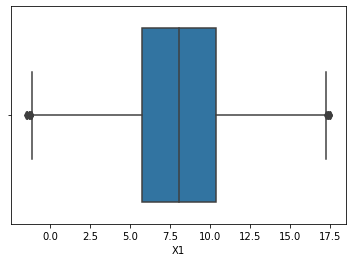

In [26]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

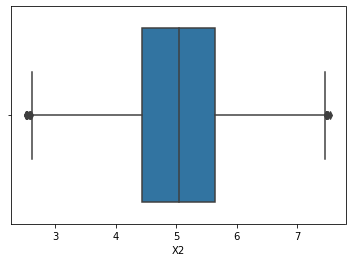

In [27]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

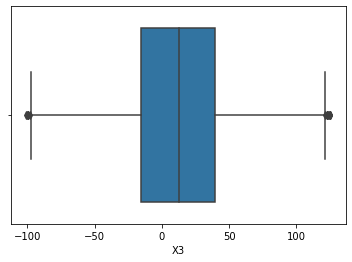

In [28]:
sns.boxplot(x = X['X3'])

In [29]:
# applying linear regression model and storing the performance in results
results = applymodel(lreg, X, y, "After removing outliers1", results)
#print(results)

MSE =  10.186786495395747
R2 score =  0.9998502181105389
Coefficients =  [[74.97161275 14.29427592  1.30838837]]
Intercept =  [8.37974583]


Increasing magnitude of outliers

In [30]:
# restoring data to previous checkpoint
X = copy.deepcopy(temp)
y = copy.deepcopy(temp1)

# adding outliers with large magnitude. the parameter False is passed in the function to use the different
# equation for outliers
X = addoutliers(X,datasize,False)

checkpto2x = copy.deepcopy(X)
checkpto2y = copy.deepcopy(y)

Number of Outliers added  633
Outliers added column wise->  218   191   224


In [31]:
print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())

21735.48409565882  and  -948.4331630536909
5607.5318054396685  and  -9309.212894480448
7679.113085288171  and  -5555.506953950328


Using boxplot to visualize outliers

<AxesSubplot:xlabel='X1'>

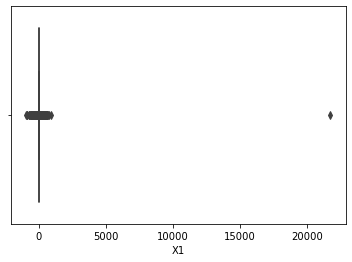

In [32]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

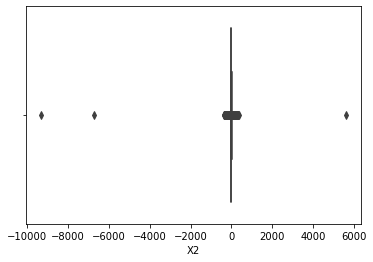

In [33]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

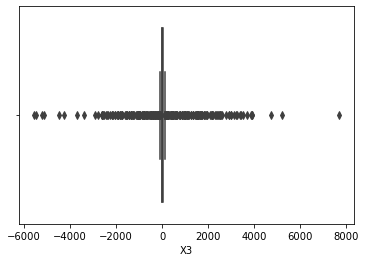

In [34]:
sns.boxplot(x = X['X3'])

In [35]:
# applying linear regression model and storing the performance in results

results = applymodel(lreg, X, y, "Adding large outliers2", results)
#print(results)

MSE =  69043.93052709813
R2 score =  -0.0007440931237983062
Coefficients =  [[0.02950635 0.01282053 0.01940793]]
Intercept =  [700.20081134]


Removing outliers using iqr method

In [36]:
print(type(X))
pos = iqroutliers(X)
#print("\n",pos[0])
#print("\n",pos[1])
#print("\n",pos)
test = pd.DataFrame(pos[0])

print("\n",test)
print("len = ", len(pos))
for i in range (1,6):

    test = test.append(pd.DataFrame(pos[i]), ignore_index = True )
print("\n",test)
test.drop_duplicates(inplace = True)
print("\n",test[0])

<class 'pandas.core.frame.DataFrame'>
5.623172883719876
10.44018824319637
4.817015359476494
17.665711282411113  and  -1.6023501554948654
4.4043211730715095
5.66179155124143
1.2574703781699208
7.547997118496312  and  2.5181156058166283
-16.077015725016466
40.80446326946422
56.88147899448069
126.12668176118525  and  -101.3992342167375

         0
0      66
1      94
2     174
3     197
4     211
..    ...
132  7952
133  8034
134  8065
135  8114
136  8242

[137 rows x 1 columns]
len =  6

         0
0      66
1      94
2     174
3     197
4     211
..    ...
761  8150
762  8195
763  8212
764  8315
765  8352

[766 rows x 1 columns]

 0        66
1        94
2       174
3       197
4       211
       ... 
761    8150
762    8195
763    8212
764    8315
765    8352
Name: 0, Length: 743, dtype: int64


In [37]:
print("X shape ", X.shape, " Y shape ", y.shape)
X.drop(test[0], inplace = True)
y.drop(test[0], inplace = True)
print("X shape ", X.shape, " Y shape ", y.shape)

X shape  (8371, 3)  Y shape  (8371, 1)
X shape  (7628, 3)  Y shape  (7628, 1)


<AxesSubplot:xlabel='X1'>

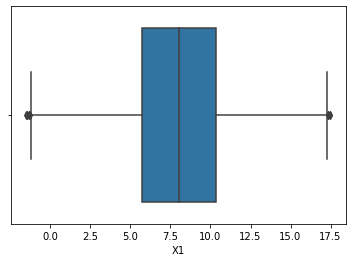

In [38]:
sns.boxplot(x = X['X1'])

<AxesSubplot:xlabel='X2'>

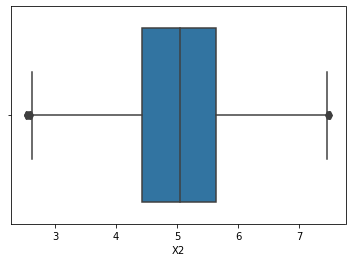

In [39]:
sns.boxplot(x = X['X2'])

<AxesSubplot:xlabel='X3'>

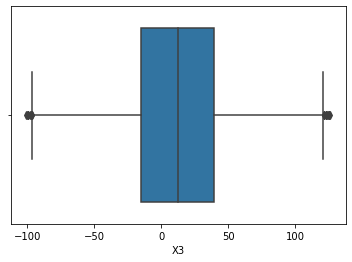

In [40]:
sns.boxplot(x = X['X3'])

In [41]:
# applying linear regression model and storing the performance in results

results = applymodel(lreg, X, y, "After removing large outliers2", results)
#print(results)

MSE =  22.897588217048323
R2 score =  0.9996576304779274
Coefficients =  [[74.98145665 14.26309545  1.3080676 ]]
Intercept =  [8.42489921]


Normalization of Covariates

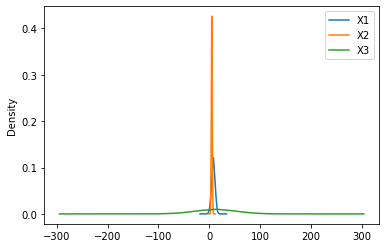

In [42]:
X = copy.deepcopy(temp)
y = copy.deepcopy(temp1)

# Checking distribution of features X1, X2, X3
ax = X.plot.kde()

In [43]:
print(type(X))
print(X)

<class 'pandas.core.frame.DataFrame'>
             X1        X2         X3
0      9.143011  4.964697   7.713315
1     13.054986  4.488517  38.407667
2      6.503288  3.036161  11.105596
3      7.100481  6.031247  84.940810
4      8.678239  4.656158  42.744585
...         ...       ...        ...
8366   5.254980  5.541932  37.597587
8367   2.716303  6.038647  10.691072
8368  10.177886  5.301352  30.227080
8369   6.468111  3.853179  56.287041
8370   8.578984  5.008459 -37.111738

[8371 rows x 3 columns]


Checking scale of the features X1, X2 and X3

In [44]:
print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
print(type(X))

21.108076680259153  and  -5.007312259844509
8.291158149594208  and  1.8612294413006403
154.34366873008796  and  -145.02255136799556
<class 'pandas.core.frame.DataFrame'>


Function for different Scalers

In [45]:
def scaledata(X,y,scaler):
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X)
    print(X.head)
    print(type(X))
    y = scaler.fit_transform(y)
    y = pd.DataFrame(y)
    return X,y


Using MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X, y = scaledata(X, y, scaler)

<bound method NDFrame.head of              0         1         2
0     0.541839  0.482660  0.510197
1     0.691634  0.408603  0.612729
2     0.440759  0.182729  0.521529
3     0.463627  0.648533  0.768167
4     0.524042  0.434675  0.627216
...        ...       ...       ...
8366  0.392960  0.572433  0.610023
8367  0.295750  0.649683  0.520144
8368  0.581466  0.535017  0.585402
8369  0.439412  0.309793  0.672453
8370  0.520241  0.489466  0.360464

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

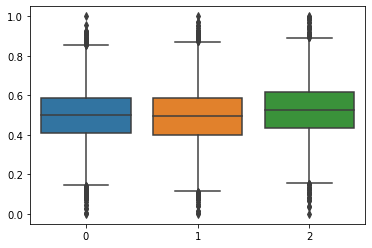

In [47]:
sns.boxplot(data = X)

In [48]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
1.0  and  0.0
0.9999999999999998  and  0.0


In [49]:
print(y.head)

<bound method NDFrame.head of              0
0     0.567258
1     0.729516
2     0.455919
3     0.545655
4     0.567882
...        ...
8366  0.446466
8367  0.337015
8368  0.623805
8369  0.489215
8370  0.515901

[8371 rows x 1 columns]>


In [50]:
# applying linear regression model and storing the performance in results

results = applymodel(lreg, X, y, "Using MinMaxScaler", results)
#print(results)

MSE =  2.2658407254189313e-06
R2 score =  0.9998644340192505
Coefficients =  [[0.96363596 0.0452927  0.19278418]]
Intercept =  [-0.07696537]


MinMaxScaler on Outliers1

In [51]:
X = copy.deepcopy(checkpto1x)
y = copy.deepcopy(checkpto1y)

<bound method NDFrame.head of              0         1         2
0     0.571698  0.596352  0.507141
1     0.602631  0.586625  0.540394
2     0.550825  0.556958  0.510816
3     0.555548  0.618138  0.590807
4     0.568023  0.590049  0.927713
...        ...       ...       ...
8366  0.540955  0.608143  0.539517
8367  0.520881  0.618289  0.510367
8368  0.579881  0.603229  0.531532
8369  0.550547  0.573647  0.559764
8370  0.567238  0.597246  0.458578

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

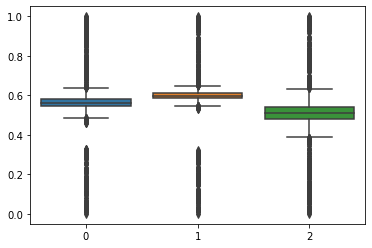

In [52]:
X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [53]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
1.0  and  0.0
1.0  and  0.0


In [54]:
# applying linear regression model and storing the performance in results
results = applymodel(lreg, X, y, "MinMaxScaler on Outlier1", results)
#print(results)

MSE =  0.01361238034482862
R2 score =  0.18556689749648492
Coefficients =  [[0.82288912 0.0468262  0.22666506]]
Intercept =  [-0.07685706]


In [55]:
print(results)

                             Case     X1mean    X2mean     X3mean       X1std  \
0              Simple Linear Reg    8.009078  5.034319  12.494093    3.485613   
1                Adding outliers1   7.807844  4.900829  11.726818    8.250799   
2        After removing outliers1   8.024325  5.035486  12.471918    3.396480   
3          Adding large outliers2  10.794304  3.928167  15.089133  245.209955   
4  After removing large outliers2   8.006716  5.042386  12.576287    3.404357   
5              Using MinMaxScaler   0.498418  0.493487   0.526167    0.133470   
6        MinMaxScaler on Outlier1   0.561141  0.595047   0.511489    0.065241   

        X2std       X3std     X1coef     X2coef    X3coef   R2Score  
0    0.919965   41.075282  74.968429  14.311459  1.308370  0.999864  
1    2.923672   65.863613  13.219894   1.943345  0.498914  0.185567  
2    0.901485   40.042345  74.971613  14.294276  1.308388  0.999850  
3  143.409987  316.723641   0.029506   0.012821  0.019408 -0.000744  
4

MinMaxScaler on Outliers2

In [56]:
X = copy.deepcopy(checkpto2x)
y = copy.deepcopy(checkpto2y)

<bound method NDFrame.head of              0         1         2
0     0.042214  0.624411  0.420354
1     0.042386  0.607037  0.422673
2     0.042098  0.624282  0.420610
3     0.042124  0.624482  0.426189
4     0.042193  0.624390  0.423001
...        ...       ...       ...
8366  0.042042  0.624450  0.422612
8367  0.041931  0.624483  0.420579
8368  0.042260  0.624433  0.422055
8369  0.042096  0.624336  0.424024
8370  0.031630  0.624414  0.416967

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

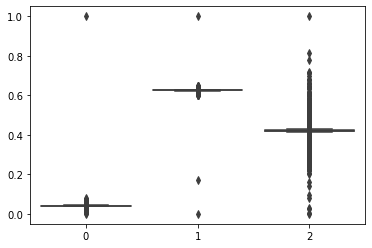

In [57]:
X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [58]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
0.9999999999999999  and  0.0
1.0  and  0.0


In [59]:
# applying linear regression model and storing the performance in results

results = applymodel(lreg, X, y, "MinMaxScaler on Outlier2", results)
#print(results)

MSE =  0.016726369767592956
R2 score =  -0.0007440931237978621
Coefficients =  [[0.32943645 0.09412781 0.12642376]]
Intercept =  [0.4030354]


Using StandardScaler

In [60]:
X = copy.deepcopy(temp)
y = copy.deepcopy(temp1)

scaler = StandardScaler()
X,y = scaledata(X, y, scaler)

<bound method NDFrame.head of              0         1         2
0     0.325337 -0.075683 -0.116398
1     1.447725 -0.593320  0.630918
2    -0.432027 -2.172122 -0.033806
3    -0.260686  1.083724  1.763860
4     0.191989 -0.411084  0.736509
...        ...       ...       ...
8366 -0.790180  0.551807  0.611195
8367 -1.518554  1.091767 -0.043898
8368  0.622254  0.290282  0.431745
8369 -0.442120 -1.283973  1.066227
8370  0.163512 -0.028111 -1.207753

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


In [61]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())

3.7582425946118616  and  -3.7345415595278992
3.5403887676630004  and  -3.449346986480619
3.453611126206967  and  -3.8350571774453464


In [62]:
results = applymodel(lreg, X, y, "Using StandardScaler", results)
#print(results)

MSE =  0.00013191269982026977
R2 score =  0.9998644340192505
Coefficients =  [[0.9812923  0.049442   0.20181425]]
Intercept =  [9.88607385e-05]


<AxesSubplot:>

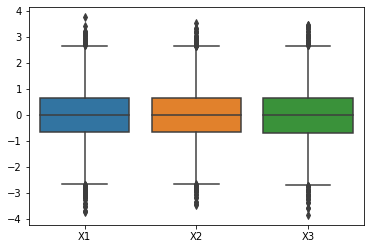

In [63]:
sns.boxplot(data = X)

StandardScaler on Outliers1

In [64]:
X = copy.deepcopy(checkpto1x)
y = copy.deepcopy(checkpto1y)

<bound method NDFrame.head of              0         1         2
0     0.161832  0.021846 -0.060940
1     0.635994 -0.141034  0.405117
2    -0.158122 -0.637821 -0.009432
3    -0.085738  0.386667  1.111666
4     0.105498 -0.083691  5.833495
...        ...       ...       ...
8366 -0.309427  0.219293  0.392817
8367 -0.617134  0.389197 -0.015727
8368  0.287267  0.137002  0.280904
8369 -0.162386 -0.358355  0.676593
8370  0.093468  0.036816 -0.741555

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

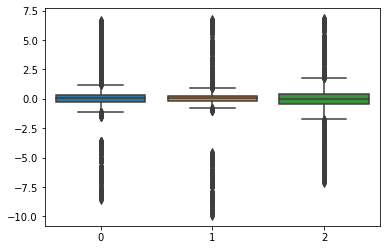

In [65]:
X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [66]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

6.727137476262947  and  -8.601556670159093
6.781136670850823  and  -9.96436273431036
6.8466094883555755  and  -7.16865190507196


In [67]:
results = applymodel(lreg, X, y, "StandardScaler on Outlier1", results)
#print(results)

MSE =  0.7924854656033768
R2 score =  0.1855668974964848
Coefficients =  [[0.40960455 0.02133632 0.1233991 ]]
Intercept =  [0.01218132]


StandardScaler on Outliers2

<bound method NDFrame.head of              0         1         2
0     0.161832  0.021846 -0.060940
1     0.635994 -0.141034  0.405117
2    -0.158122 -0.637821 -0.009432
3    -0.085738  0.386667  1.111666
4     0.105498 -0.083691  5.833495
...        ...       ...       ...
8366 -0.309427  0.219293  0.392817
8367 -0.617134  0.389197 -0.015727
8368  0.287267  0.137002  0.280904
8369 -0.162386 -0.358355  0.676593
8370  0.093468  0.036816 -0.741555

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

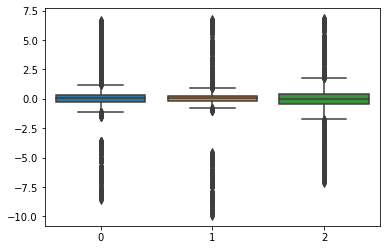

In [68]:
X = copy.deepcopy(checkpto1x)
y = copy.deepcopy(checkpto1y)

X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [69]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

6.727137476262947  and  -8.601556670159093
6.781136670850823  and  -9.96436273431036
6.8466094883555755  and  -7.16865190507196


In [70]:
results = applymodel(lreg, X, y, "StandardScaler on Outlier2", results)
#print(results)

MSE =  0.7924854656033768
R2 score =  0.1855668974964848
Coefficients =  [[0.40960455 0.02133632 0.1233991 ]]
Intercept =  [0.01218132]


Using QuantileTransformer

In [71]:
X = copy.deepcopy(temp)
y = copy.deepcopy(temp1)

scaler = QuantileTransformer()
X, y = scaledata(X, y, scaler)

<bound method NDFrame.head of              0         1         2
0     0.631591  0.468753  0.447825
1     0.925330  0.273911  0.738728
2     0.327059  0.016119  0.483338
3     0.390339  0.858820  0.961340
4     0.584767  0.334780  0.769776
...        ...       ...       ...
8366  0.213391  0.712927  0.731555
8367  0.066388  0.861870  0.478670
8368  0.732317  0.608589  0.667325
8369  0.323165  0.101762  0.854964
8370  0.571438  0.485798  0.113477

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


In [72]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
1.0  and  0.0
1.0  and  0.0


In [73]:
results = applymodel(lreg, X, y, "Using QuantileTransform", results)
#print(results)

MSE =  0.0007085243842480208
R2 score =  0.9912322253454323
Coefficients =  [[0.98021581 0.04693772 0.19185366]]
Intercept =  [-0.10913347]


<AxesSubplot:>

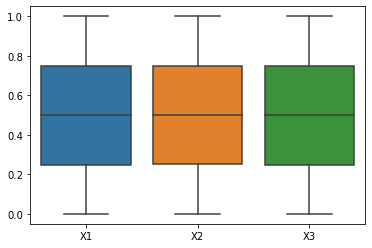

In [74]:
sns.boxplot(data = X)

QuantileTransform on Outliers1

<bound method NDFrame.head of              0         1         2
0     0.627408  0.469798  0.450494
1     0.913451  0.280090  0.733654
2     0.331292  0.028741  0.484660
3     0.391487  0.849779  0.950415
4     0.582344  0.339310  0.996771
...        ...       ...       ...
8366  0.220450  0.707374  0.726397
8367  0.077651  0.852514  0.480722
8368  0.726351  0.606525  0.664090
8369  0.327534  0.113062  0.847655
8370  0.569328  0.486585  0.123627

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

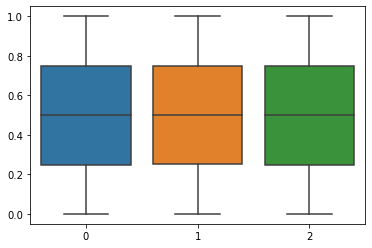

In [75]:
X = copy.deepcopy(checkpto1x)
y = copy.deepcopy(checkpto1y)

X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [76]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
1.0  and  0.0
1.0  and  0.0


In [77]:
results = applymodel(lreg, X, y, "QuantileTransform on Outlier1", results)
#print(results)

MSE =  0.00808784455689684
R2 score =  0.8999153732848517
Coefficients =  [[0.92491059 0.04889926 0.1786722 ]]
Intercept =  [-0.07501126]


QuantileTransform on Outliers2

<bound method NDFrame.head of              0         1         2
0     0.627408  0.469798  0.450494
1     0.913451  0.280090  0.733654
2     0.331292  0.028741  0.484660
3     0.391487  0.849779  0.950415
4     0.582344  0.339310  0.996771
...        ...       ...       ...
8366  0.220450  0.707374  0.726397
8367  0.077651  0.852514  0.480722
8368  0.726351  0.606525  0.664090
8369  0.327534  0.113062  0.847655
8370  0.569328  0.486585  0.123627

[8371 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

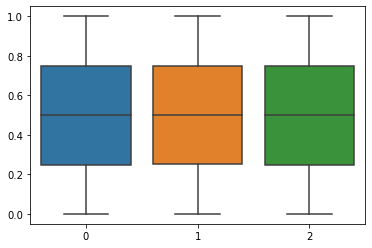

In [78]:
X = copy.deepcopy(checkpto1x)
y = copy.deepcopy(checkpto1y)

X, y = scaledata(X, y, scaler)

sns.boxplot(data = X)

In [79]:
X = X.rename({0: 'X1', 1: 'X2', 2: 'X3'}, axis=1)  # keeping column names consistent to be used with results

print(X['X1'].max()," and ", X['X1'].min())
print(X['X2'].max()," and ", X['X2'].min())
print(X['X3'].max()," and ", X['X3'].min())
#print(X.head)

1.0  and  0.0
1.0  and  0.0
1.0  and  0.0


In [80]:
results = applymodel(lreg, X, y, "QuantileTransform on Outlier2", results)
#print(results)

MSE =  0.00808784455689684
R2 score =  0.8999153732848517
Coefficients =  [[0.92491059 0.04889926 0.1786722 ]]
Intercept =  [-0.07501126]


Final results

In [81]:
print(results[['Case', 'X1mean', 'X2mean', 'X3mean']])

                              Case        X1mean        X2mean        X3mean
0               Simple Linear Reg   8.009078e+00  5.034319e+00  1.249409e+01
1                 Adding outliers1  7.807844e+00  4.900829e+00  1.172682e+01
2         After removing outliers1  8.024325e+00  5.035486e+00  1.247192e+01
3           Adding large outliers2  1.079430e+01  3.928167e+00  1.508913e+01
4   After removing large outliers2  8.006716e+00  5.042386e+00  1.257629e+01
5               Using MinMaxScaler  4.984184e-01  4.934875e-01  5.261671e-01
6         MinMaxScaler on Outlier1  5.611409e-01  5.950472e-01  5.114890e-01
7         MinMaxScaler on Outlier2  4.228668e-02  6.243414e-01  4.209109e-01
8             Using StandardScaler -5.077835e-16  8.666845e-16  1.856782e-18
9       StandardScaler on Outlier1  8.605853e-18 -1.227631e-16 -6.976195e-18
10      StandardScaler on Outlier2  8.605853e-18 -1.227631e-16 -6.976195e-18
11         Using QuantileTransform  4.999939e-01  5.000056e-01  5.000010e-01

In [82]:
print(results[['Case','X1std','X2std','X3std']])

                              Case       X1std       X2std       X3std
0               Simple Linear Reg     3.485613    0.919965   41.075282
1                 Adding outliers1    8.250799    2.923672   65.863613
2         After removing outliers1    3.396480    0.901485   40.042345
3           Adding large outliers2  245.209955  143.409987  316.723641
4   After removing large outliers2    3.404357    0.895623   40.059359
5               Using MinMaxScaler    0.133470    0.143075    0.137207
6         MinMaxScaler on Outlier1    0.065241    0.059721    0.071355
7         MinMaxScaler on Outlier2    0.010810    0.009614    0.023931
8             Using StandardScaler    1.000060    1.000060    1.000060
9       StandardScaler on Outlier1    1.000060    1.000060    1.000060
10      StandardScaler on Outlier2    1.000060    1.000060    1.000060
11         Using QuantileTransform    0.288727    0.288726    0.288726
12   QuantileTransform on Outlier1    0.288723    0.288725    0.288724
13   Q

In [83]:
print(results[['Case','X1coef','X2coef','X3coef']])

                              Case     X1coef     X2coef    X3coef
0               Simple Linear Reg   74.968429  14.311459  1.308370
1                 Adding outliers1  13.219894   1.943345  0.498914
2         After removing outliers1  74.971613  14.294276  1.308388
3           Adding large outliers2   0.029506   0.012821  0.019408
4   After removing large outliers2  74.981457  14.263095  1.308068
5               Using MinMaxScaler   0.963636   0.045293  0.192784
6         MinMaxScaler on Outlier1   0.822889   0.046826  0.226665
7         MinMaxScaler on Outlier2   0.329436   0.094128  0.126424
8             Using StandardScaler   0.981292   0.049442  0.201814
9       StandardScaler on Outlier1   0.409605   0.021336  0.123399
10      StandardScaler on Outlier2   0.409605   0.021336  0.123399
11         Using QuantileTransform   0.980216   0.046938  0.191854
12   QuantileTransform on Outlier1   0.924911   0.048899  0.178672
13   QuantileTransform on Outlier2   0.924911   0.048899  0.17

In [84]:
print(results[['Case','R2Score']])

                              Case   R2Score
0               Simple Linear Reg   0.999864
1                 Adding outliers1  0.185567
2         After removing outliers1  0.999850
3           Adding large outliers2 -0.000744
4   After removing large outliers2  0.999658
5               Using MinMaxScaler  0.999864
6         MinMaxScaler on Outlier1  0.185567
7         MinMaxScaler on Outlier2 -0.000744
8             Using StandardScaler  0.999864
9       StandardScaler on Outlier1  0.185567
10      StandardScaler on Outlier2  0.185567
11         Using QuantileTransform  0.991232
12   QuantileTransform on Outlier1  0.899915
13   QuantileTransform on Outlier2  0.899915
